# Mesa ABM of the Keep Threshold Relay

### Simulation notes and instructions

Notes:
* Nodes are created simulataneously using the Mesa SimultaneousActivation scheduler
* The nodes go through a bootstrap phase based on Antonio's diagram. They can only form groups if they are in the mainloop forked state.
* Relay requests are currently bernoulli trials
* Singature events are modeled by default as asynchronous with a step delay to mimick the block delay

Instructions:
1. Change variables
2. Click on the restart and run kernel icon for ipython

    

In [1]:
import random
import simpy
import datetime
import numpy as np
import pandas as pd
import agent
import model
import matplotlib.pyplot as plt
import simulation_functions as sc

**Initialize Variables**

In [2]:
group_size = 5 # Group size
#total_tickets = 500 # total virtual stakers
nodes = 20 # number of nodes
active_group_threshold = 4 # min number of active groups to pick from
signature_threshold = 15  # min number of nodes needed to sign
signature_delay = 2 # lambda for poisson distribution used to generate a delay before the signature is executed
group_expiry = 10 #number of steps after which a group expires
group_formation_threshold = 3 # min number of nodes needed to create a group
node_failure_percent = 50 # % of times nodes fail and have to reconnect
node_death_percent = 5 # % of time nodes fail and do not reconnect


Text(0.5, 1.0, 'Virtual Staker Cumulative Distribution')

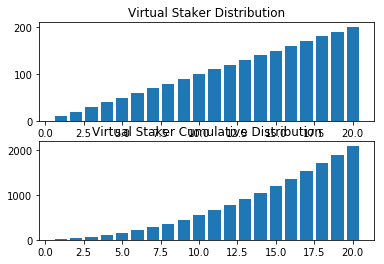

In [3]:
# Pre-processing Staker distributions
# Linear y = m * (x + 1) since indices start from 0
ticket_distribution = np.zeros(nodes) 

for i in range (0, nodes):
    ticket_distribution[i] =  10 * (i + 1) # m = 50 gives max y as 1000 which is 2% of 50000

x = np.linspace(1,nodes,nodes)
plt.subplot(2, 1, 1)
plt.bar(x, ticket_distribution)
plt.title("Virtual Staker Distribution")

cdf_L02=sc.create_cdf(nodes,ticket_distribution)
plt.subplot(2, 1, 2)
plt.bar(x, cdf_L02)
plt.title("Virtual Staker Cumulative Distribution")

In [4]:
beacon_model = model.Beacon_Model(nodes, ticket_distribution, 
                                  active_group_threshold, 
                                  group_size, 
                                  signature_threshold, 
                                  group_expiry, 
                                  group_formation_threshold, 
                                  node_failure_percent, 
                                  node_death_percent, 
                                  signature_delay
                                 )

In [5]:
active_group_size = []
signature_failures = []
for i in range (200):
    beacon_model.step()
    active_group_size.append(len(beacon_model.active_groups))
    print("signature failure events")
    print(beacon_model.unsuccessful_signature_events)
    

step # = 0
refreshing active nodes list
Number of nodes in the forked state = 0
bootstrapping active groups
number of active groups = 0
relay request recieved? = False
     No relay request
signature failure events
[]
step # = 1
refreshing active nodes list
Number of nodes in the forked state = 4
bootstrapping active groups
number of active groups = 4
group ID 0status = Activesteps to expiry = 10
group ID 1status = Activesteps to expiry = 10
group ID 2status = Activesteps to expiry = 10
group ID 3status = Activesteps to expiry = 10
relay request recieved? = False
     No relay request
signature failure events
[]
step # = 2
refreshing active nodes list
Number of nodes in the forked state = 14
number of active groups = 4
group ID 0status = Activesteps to expiry = 9
group ID 1status = Activesteps to expiry = 9
group ID 2status = Activesteps to expiry = 9
group ID 3status = Activesteps to expiry = 9
relay request recieved? = False
     No relay request
signature failure events
[]
step # = 

group ID 4status = Expiredsteps to expiry = -52
group ID 5status = Expiredsteps to expiry = -50
group ID 6status = Expiredsteps to expiry = -47
group ID 7status = Expiredsteps to expiry = -44
group ID 8status = Expiredsteps to expiry = -41
group ID 9status = Expiredsteps to expiry = -38
group ID 10status = Expiredsteps to expiry = -35
group ID 11status = Expiredsteps to expiry = -31
group ID 12status = Expiredsteps to expiry = -30
group ID 13status = Expiredsteps to expiry = -29
group ID 14status = Expiredsteps to expiry = -26
group ID 15status = Expiredsteps to expiry = -21
group ID 16status = Expiredsteps to expiry = -20
group ID 17status = Expiredsteps to expiry = -19
group ID 18status = Expiredsteps to expiry = -17
group ID 19status = Expiredsteps to expiry = -15
group ID 20status = Expiredsteps to expiry = -9
group ID 21status = Expiredsteps to expiry = -5
group ID 22status = Expiredsteps to expiry = -4
group ID 23status = Expiredsteps to expiry = -2
group ID 24status = Activestep

Signature ID 104 Delay = 1
     Checking for active nodes in randomly selected group
4.0
         signature unsuccessful
Starting signature process for signature ID = 108
signature failure events
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
step # = 105
refreshing active nodes list
Number of nodes in the forked state = 11
number of active groups = 5
group ID 0status = Expiredsteps to expiry = -94
group ID 1status = Expiredsteps to expiry = -94
group ID 2status = Expiredsteps to expiry = -94
group ID 3status = Expiredsteps to expiry = -94
group ID 4status = Expiredsteps to expiry = -91
group ID 5status = Expiredsteps to expiry = -89
group ID 6status = Expiredsteps to expiry = -86
group ID 7status = Expiredsteps to expiry = -83
group ID 8status = Expiredsteps to expiry = -80
group ID 9status = Expiredsteps to expiry = -77
group ID 10status = Expiredsteps to expiry = -74
group ID 11status = Expiredsteps to expi

group ID 4status = Expiredsteps to expiry = -120
group ID 5status = Expiredsteps to expiry = -118
group ID 6status = Expiredsteps to expiry = -115
group ID 7status = Expiredsteps to expiry = -112
group ID 8status = Expiredsteps to expiry = -109
group ID 9status = Expiredsteps to expiry = -106
group ID 10status = Expiredsteps to expiry = -103
group ID 11status = Expiredsteps to expiry = -99
group ID 12status = Expiredsteps to expiry = -98
group ID 13status = Expiredsteps to expiry = -97
group ID 14status = Expiredsteps to expiry = -94
group ID 15status = Expiredsteps to expiry = -89
group ID 16status = Expiredsteps to expiry = -88
group ID 17status = Expiredsteps to expiry = -87
group ID 18status = Expiredsteps to expiry = -85
group ID 19status = Expiredsteps to expiry = -83
group ID 20status = Expiredsteps to expiry = -77
group ID 21status = Expiredsteps to expiry = -73
group ID 22status = Expiredsteps to expiry = -72
group ID 23status = Expiredsteps to expiry = -70
group ID 24status =

Signature ID 164 Delay = 1
Signature ID 166 Delay = 3
Starting signature process for signature ID = 168
signature failure events
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
step # = 158
refreshing active nodes list
Number of nodes in the forked state = 12
number of active groups = 5
group ID 0status = Expiredsteps to expiry = -147
group ID 1status = Expiredsteps to expiry = -147
group ID 2status = Expiredsteps to expiry = -147
group ID 3status = Expiredsteps to expiry = -147
group ID 4status = Expiredsteps to expiry = -144
group ID 5status = Expiredsteps to expiry = -142
group ID 6status = Expiredsteps to expiry = -139
group ID 7status = Expiredsteps to expiry = -136
group ID 8status = Expiredsteps to expiry = -133
group ID 9status = Expiredsteps to expiry = -130
group ID 10status = Expiredsteps to expiry = -127
group ID 

group ID 7status = Expiredsteps to expiry = -157
group ID 8status = Expiredsteps to expiry = -154
group ID 9status = Expiredsteps to expiry = -151
group ID 10status = Expiredsteps to expiry = -148
group ID 11status = Expiredsteps to expiry = -144
group ID 12status = Expiredsteps to expiry = -143
group ID 13status = Expiredsteps to expiry = -142
group ID 14status = Expiredsteps to expiry = -139
group ID 15status = Expiredsteps to expiry = -134
group ID 16status = Expiredsteps to expiry = -133
group ID 17status = Expiredsteps to expiry = -132
group ID 18status = Expiredsteps to expiry = -130
group ID 19status = Expiredsteps to expiry = -128
group ID 20status = Expiredsteps to expiry = -122
group ID 21status = Expiredsteps to expiry = -118
group ID 22status = Expiredsteps to expiry = -117
group ID 23status = Expiredsteps to expiry = -115
group ID 24status = Expiredsteps to expiry = -111
group ID 25status = Expiredsteps to expiry = -110
group ID 26status = Expiredsteps to expiry = -109
gro

     selecting group at random
     registering new group
Signature ID 206 Delay = 4
Signature ID 208 Delay = 1
Signature ID 210 Delay = 3
Starting signature process for signature ID = 212
signature failure events
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
step # = 198
refreshing active nodes list
Number of nodes in the forked state = 13
number of active groups = 5
group ID 0status = Expiredsteps to expiry = -187
group ID 1status = Expiredsteps to expiry = -187
group ID 2status = Expiredsteps to expiry = -187
group ID 3status = Expiredsteps to expiry = -187
group ID 4status = Expiredsteps to expiry = -184
group ID 5status = Expiredsteps to expiry = -182
group ID 6status = Expiredsteps to expiry = -179
group ID 7status = Expiredsteps to expiry = -176
group ID 

5.0


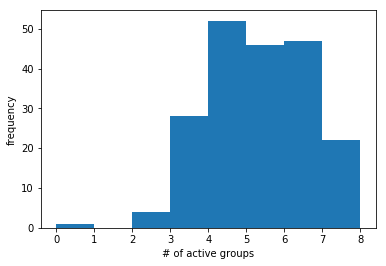

In [6]:
plt.hist(active_group_size, bins=range(max(active_group_size)+1))
plt.xlabel("# of active groups")
plt.ylabel("frequency")
print(np.median(active_group_size))

Text(0, 0.5, 'active groups')

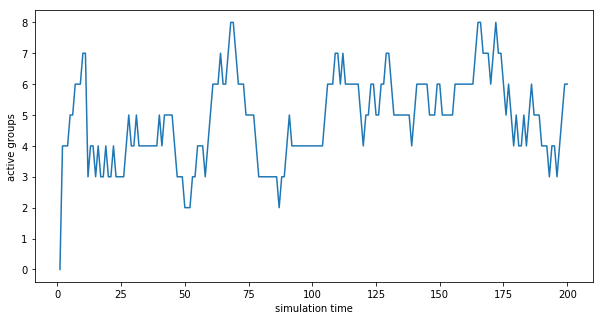

In [7]:
plt.figure(figsize = (10,5))
plt.plot(np.linspace(1,len(active_group_size),len(active_group_size)),active_group_size)
plt.xlabel("simulation time")
plt.ylabel("active groups")

Text(0, 0.5, 'Signature failure events')

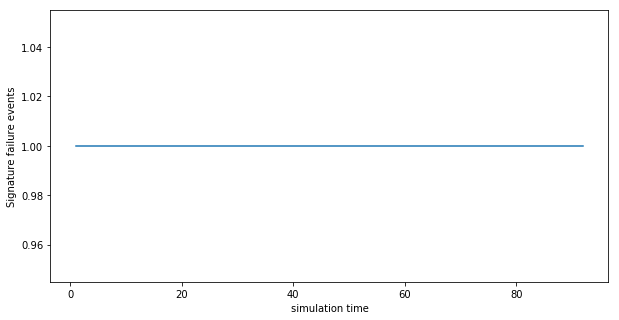

In [8]:
plt.figure(figsize = (10,5))
plt.plot(np.linspace(1,len(beacon_model.unsuccessful_signature_events),
                     len(beacon_model.unsuccessful_signature_events)),
                     beacon_model.unsuccessful_signature_events)
plt.xlabel("simulation time")
plt.ylabel("Signature failure events")

33.0


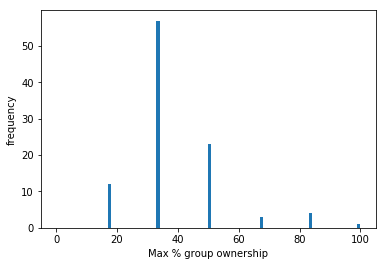

In [9]:
max_group_ownership = []
for group in beacon_model.schedule.agents:
    if group.type == "group":
        #print(group.ownership_distr)
        #print(max(group.ownership_distr)/sum(group.ownership_distr))
        max_group_ownership.append(int(round(max(group.ownership_distr)/sum(group.ownership_distr)*100)))

plt.hist(max_group_ownership, bins=range(max(max_group_ownership)+1))
plt.xlabel("Max % group ownership")
plt.ylabel("frequency")
print(np.median(max_group_ownership))

33.0


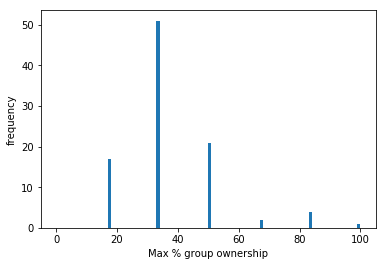

In [10]:
max_signature_ownership = []
for signature in beacon_model.schedule.agents:
    if signature.type == "signature":
        #print(signature.id)
        #print(signature.ownership_distr)
        max_signature_ownership.append(int(round(max(signature.ownership_distr)/sum(signature.ownership_distr)*100)))
plt.hist(max_signature_ownership, bins=range(max(max_signature_ownership)+1))
plt.xlabel("Max % group ownership")
plt.ylabel("frequency")
print(np.median(max_signature_ownership))